# Infinite plate with time varying surface temperature
### Problem 8.1.8 of heat transfer solutions manual

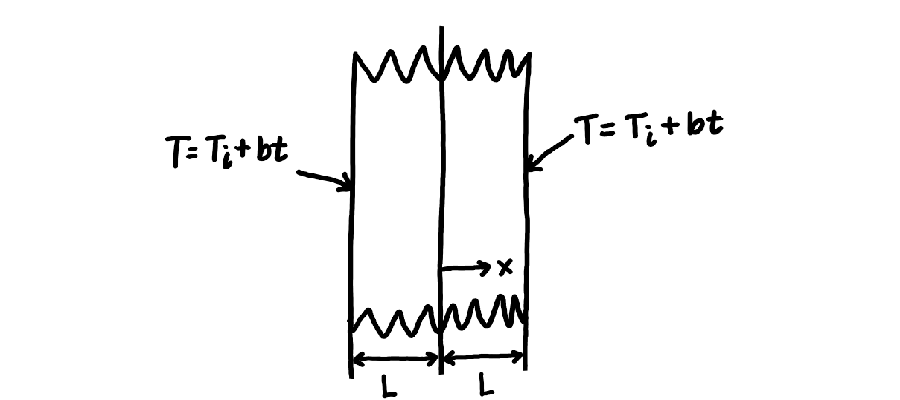

In [57]:
from PIL import Image
img = Image.open('Diagram(1).PNG')
img = img.resize((900, 400))
img

### Expression of unsolved differential equation and explanation of terms:

The conservation equation in cartesian coordinates:

$$\rho \hat{c}_p ( \frac{\partial T}{\partial t} + v_x\frac{\partial T}{\partial x} + v_y\frac{\partial T}{\partial y} + v_z\frac{\partial T}{\partial z} ) = \kappa ( \frac{\partial ^2T}{\partial x^2} + \frac{\partial ^2T}{\partial y^2} + \frac{\partial ^2T}{\partial z^2} ) + H_v$$

Assuming no velocity, no dependence on y and z componenets, and no heat generation, the equation reduces to:

$$ \alpha \frac{\partial ^2T}{\partial x^2} = \frac{\partial T}{\partial t} $$

With the following boundary and initial conditions:

$$ BC 1: T(-L,t)=T_i+bt \quad BC 2: T(L,t)=T_i+bt \qquad IC: T(x,0)=T_i $$

$$\qquad$$

| Symbol            | Name                 | Units            | Expression                     |
|-------------------|----------------------|------------------|--------------------------------|
| $T_i$             | Initial temperature  | $K$              |                                |
| $b$               | Time constant        | $\frac{1}{s}$    |                                |
| $\kappa$          | Thermal conductivity | $\frac{W}{mK}$   |                                |
| $\rho$            | Density              | $\frac{kg}{m^3}$ |                                | 
| $\hat{c}_p$       | Heat capacity        | $\frac{J}{molK}$ |                                |
| $\alpha$          | Thermal diffusivity  | $\frac{m^2}{s}$  | $\frac{\kappa}{\rho\hat{c}_p}$ |




### Explanation of expected behavior:

We expect the temperature to have a set initial temperature, and the two boundaries will change with time. For high thermal diffusivity ($\alpha$), the profile will be flat. For lower thermal diffusivity, the profile will create a u shape. As we change the time constant b, the temperature range will change. 

### Step-by-step solution using analyitical methods:

Define new variable, $\theta$, to create homogeneous boundary and initial conditions:

$$ \theta = T - T_i - bt $$

$$ \theta (-L, t) = T (-L, t) - T_i - bt = T_i + bt - T_i - bt = 0 $$
$$ \theta (L, t) = T (L, t) - T_i - bt = T_i + bt - T_i - bt = 0 $$
$$ \theta (x, 0) = T(x, 0) - T_i - b(0) = T_i - T_i = 0 $$

$$ BC 1: \theta (-L, t) = 0, \qquad BC 2: \theta (L, t) = 0, \qquad IC: \theta (x, 0) = 0 $$

Apply the new variable to original PDE:

$$ \alpha \frac{\partial ^2T}{\partial x^2} = \frac{\partial T}{\partial t} $$

$$T = \theta + T_i + bt $$

$$ \frac{\partial ^2T}{\partial x^2} = \frac{\partial ^2}{\partial x^2} (\theta + T_i + bt) = \frac{\partial}{\partial x} (\frac{\partial \theta}{\partial x}) = \frac{\partial ^2\theta}{\partial x^2} $$

$$ \frac{\partial T}{\partial t} = \frac{\partial}{\partial t} (\theta + T_i + bt) = \frac{\partial \theta}{\partial t} + b $$

The new PDE becomes:

$$ \alpha \frac{\partial ^2\theta}{\partial x^2} = \frac{\partial \theta}{\partial t} + b $$


Use Fourier Transforms to turn PDE into ODE:

$$ \frac{\partial ^2\theta}{\partial x^2} = - \lambda \phi $$

When $\lambda > 0$:

$$ \theta = Asin\sqrt{\lambda}x + Bcos\sqrt{\lambda}x $$

Apply BC 1 when $\theta (-L, t) = 0$ and solve for A:

$$ 0 = Asin\sqrt{\lambda}(-L) + Bcos\sqrt{\lambda}(-L) = -Asin\sqrt{\lambda}L + Bcos\sqrt{\lambda}L $$

$$ A = \frac{Bcos\sqrt{\lambda}L}{sin\sqrt{\lambda}L} $$

Apply BC 2 when $\theta (L, t) = 0$ and solve for B:

$$ 0 = Asin\sqrt{\lambda}L + Bcos\sqrt{\lambda}L $$

$$ 0 = \frac{Bcos\sqrt{\lambda}L}{sin\sqrt{\lambda}L}sin\sqrt{\lambda}L + Bcos\sqrt{\lambda}L $$

$$ 0 = 2Bcos\sqrt{\lambda}L $$

To avoid the trivial solution, our eigenfunction and eigenvalues must become:

$$ \phi_n = B_ncos\sqrt{\lambda_n}x, \qquad \lambda_n=(2n+1)^2\frac{\pi^2}{4L^2}, \qquad  B_n = \frac{1}{\sqrt{\int_{-L}^{L} \phi_n(x)^2 dx}} = \frac{1}{\sqrt{L}}, \qquad n = 0, 1, 2... $$

$$ \phi_n = \frac{1}{\sqrt{L}} cos(2n+1)\frac{\pi x}{2L}, \qquad n = 0, 1, 2... $$

Check if $\lambda = 0$:

$$ \theta = Ax + B $$

Apply BC's:

$$ 0 = -AL + B $$
$$ 0 = AL + B $$

Only the trivial solution exists. Therefore, $\lambda$ cannot equal $0$.

Apply the Finite Fourier Transform to each term in the PDE, turning our equation into an ODE:

$$ -\alpha\lambda_n\theta_n = \frac{d \theta_n}{d t} + b_n $$

Separate and integrate:

$$ \frac{d\theta_n}{dt} = -\alpha\lambda_n\theta_n-b_n \longrightarrow \int \frac{d\theta_n}{-\alpha \lambda_n \theta_n - b_n} = \int dt \longrightarrow \frac{-1}{\alpha \lambda_n} ln(-\alpha \lambda_n \theta_n - b_n) = t + C \longrightarrow -\alpha \lambda_n \theta_n - b_n = C e^{-t\alpha\lambda_n} $$

$$ \theta_n = \frac{- b_n - C e^{-t\alpha\lambda_n}}{\alpha \lambda_n} $$

Apply IC to solve for integration constant:

$$ \theta(x, 0) = 0 $$

$$ \theta_n(0) = 0 = \frac{-C - b_n}{\alpha \lambda_n}, \qquad C = -b_n $$

$$ \theta_n = \frac{b_n}{\alpha \lambda_n} (e^{-t \alpha \lambda_n} - 1) $$

Solve for $b_n$:

$$ b_n = b \int_{-L}^{L} \phi(x) dx = \frac{b}{\sqrt{L}} \int_{-L}^{L} cos (2n+1)\frac{\pi x}{2L} dx = \frac{b}{\sqrt{L}} \frac{4L}{(2n+1)\pi} sin(2n+1)\frac{\pi}{2} = \frac{b}{\sqrt{L}} \frac{4L}{(2n+1)\pi} (-1)^n $$

Transform $\theta_n$ to $\theta$:

$$ \theta = \sum_{n = 0}^{\infty} \phi_n \theta_n $$

$$ \phi_n = \frac{1}{\sqrt{L}} cos\sqrt{\lambda_n}x, \qquad \theta_n = \frac{b_n}{\alpha \lambda_n} (e^{-t \alpha \lambda_n} - 1)  $$ 

$$ b_n = \frac{b}{\sqrt{L}} \frac{4L}{(2n+1)\pi} (-1)^n, \qquad \lambda_n = (2n+1)^2\frac{\pi^2}{4L^2}, \qquad n = 0, 1, 2...  $$


Finally, return to T variable for the final solution:

$$ T = \theta + T_i + bt $$

### Plot of the solution:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

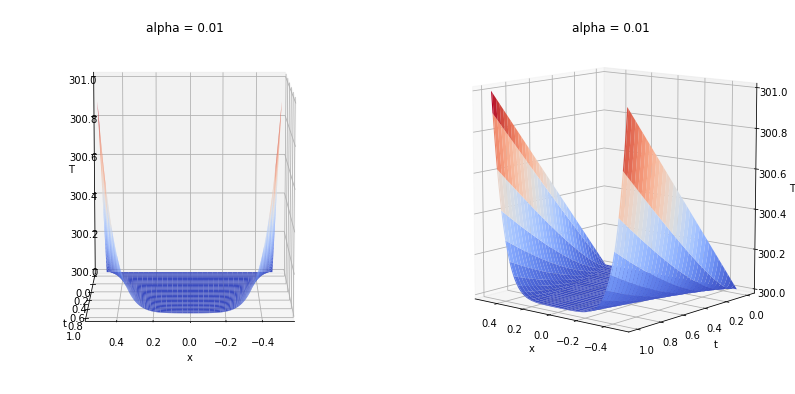

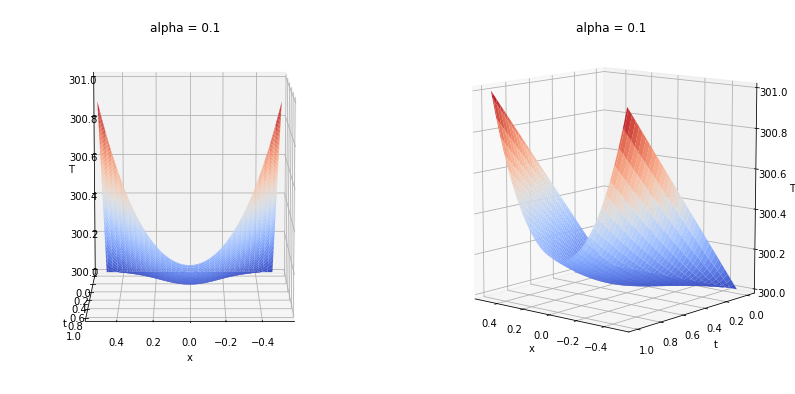

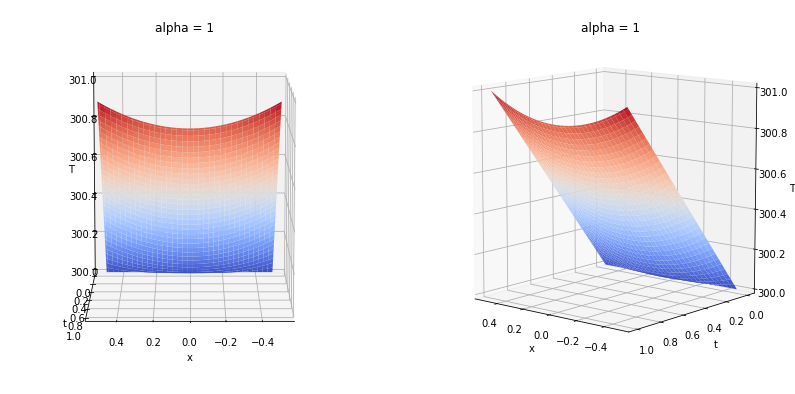

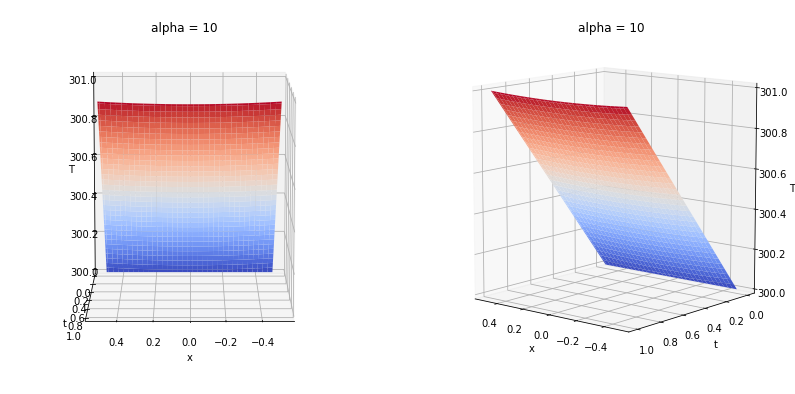

In [3]:
# constants
L = 0.5 # length of plate
Ti = 300 # initial temperature

d = 101

# define x and t
x = np.linspace(-L, L, d)
t = np.linspace(0, 1, d)

xv, tv = np.meshgrid(x, t)

for i, a in enumerate([0.01, 0.1, 1, 10]):
    theta = 0*xv
    b = 1 # time constant

    # theta summation
    for n in range(0, 200):
        lambdan = (((2*n+1)*np.pi)/(2*L))**2
        phin = (1/L**(1/2))*np.cos((lambdan)**(1/2)*xv)
        bn = b*(1/L)**(1/2)*4*L/((2*n+1)*np.pi)*(-1)**n
        thetan = bn/(a*lambdan)*(np.exp(-tv*a*lambdan)-1)
        theta += phin*thetan

    # solve for final T
    T = theta + Ti + b*tv

    fig = plt.figure(figsize=(14,7))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(xv, tv, T, cmap=cm.coolwarm)

    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('T')
    plt.title('alpha = {}'.format(a))
    ax.view_init(elev=10, azim=90)

    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.plot_surface(xv, tv, T, cmap=cm.coolwarm)

    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('T')
    plt.title('alpha = {}'.format(a))
    ax.view_init(elev=10, azim=130)

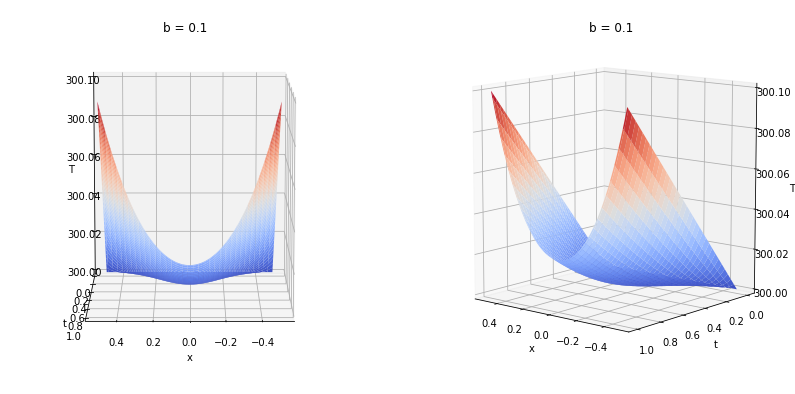

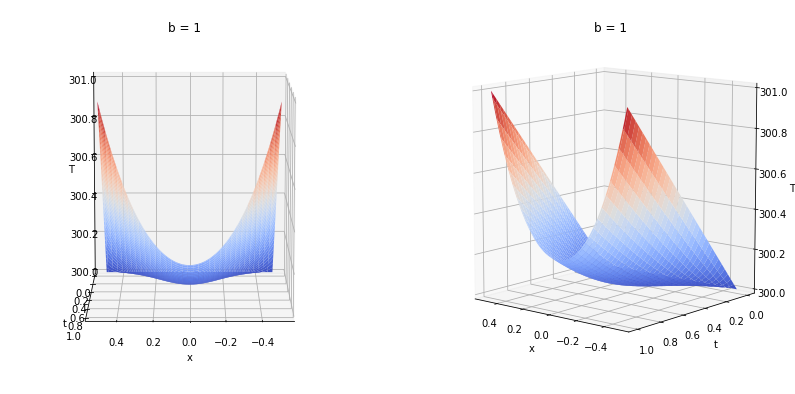

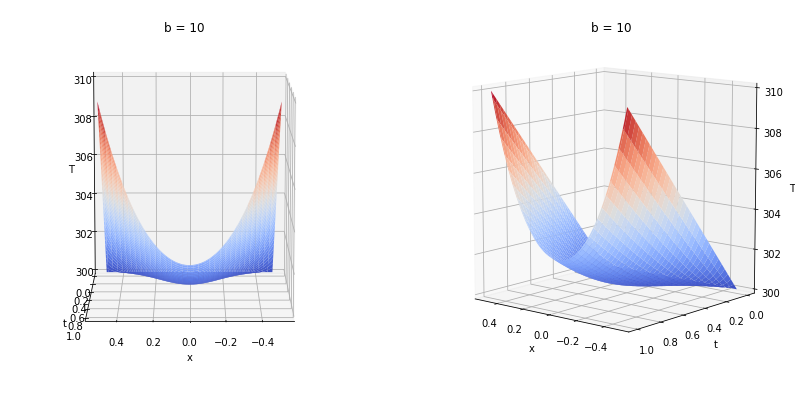

In [4]:
a = 0.1

for i, b in enumerate([0.1, 1, 10]):
    theta = 0*xv

    # theta summation
    for n in range(0, 200):
        lambdan = (((2*n+1)*np.pi)/(2*L))**2
        phin = (1/L**(1/2))*np.cos((lambdan)**(1/2)*xv)
        bn = b*(1/L)**(1/2)*4*L/((2*n+1)*np.pi)*(-1)**n
        thetan = bn/(a*lambdan)*(np.exp(-tv*a*lambdan)-1)
        theta += phin*thetan

    # solve for final T
    T = theta + Ti + b*tv

    fig = plt.figure(figsize=(14,7))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(xv, tv, T, cmap=cm.coolwarm)

    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('T')
    plt.title('b = {}'.format(b))
    ax.view_init(elev=10, azim=90)

    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.plot_surface(xv, tv, T, cmap=cm.coolwarm)

    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('T')
    plt.title('b = {}'.format(b))
    ax.view_init(elev=10, azim=130)

### Explanation of solution behavior:

The solution behaves as we expected. With high thermal diffusivity, the profile approaches a flat line. As thermal diffusivity decreases, the center of the plate remains at the initial temperature, while the boundaries increase linearly with b. 

As we vary b, it changes the temperature range across which heat transfer occurs. As b increases, the temperature range increases as well. 